In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
#from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal
import modules.anal_func as anal_func

In [3]:
snap = 90
n = 0
sb = anal.Simba('cis', size='50_full')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)
print(snapfile)

/mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full/snap_m50n512_090.hdf5


In [4]:
toplot = ['Masses', 'Masses', 'Masses_s']

In [5]:
render = RenderRGB(snapfile, catfile, n, toplot, region=False, ifdust=True, dim=['Msun', 'Msun', 'Msun'])

NameError: name 'RenderRGB' is not defined

Camera settings: Center=[14250.62571614 19562.31371731 21815.03522849], Extent=100, Theta=None, Phi=None, Roll=0, Radius=infinity, XSize=400, YSize=400


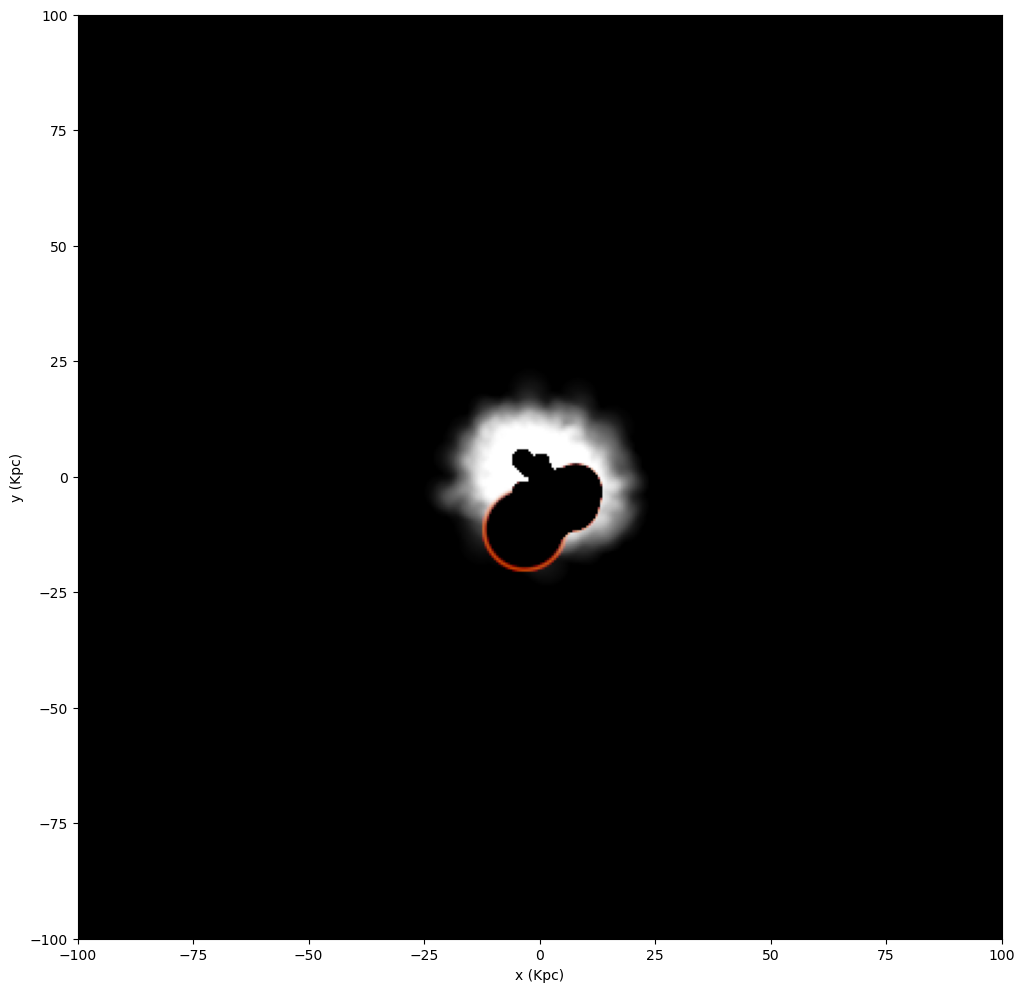

In [10]:
camera = render.set_camera(r='infinity', p=None, t=None, extent=100, zoom=2, spos=None)
image = render.generate_images(camera, vmin=1, vmax=99)
render.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

In [5]:
rendmap = SingleRender(snapfile, catfile, n, ('PartType4', 'Masses'), region=True, dim='Msun')

yt : [INFO     ] 2024-08-29 17:57:20,165 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-08-29 17:57:20,184 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-08-29 17:57:20,185 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-29 17:57:20,297 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-08-29 17:57:20,298 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-29 17:57:20,299 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-29 17:57:20,300 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-08-29 17:57:20,301 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-08-29 17:57:20,302 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-08-29 17:57:20,302 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-29 17:57:20,303 Parame

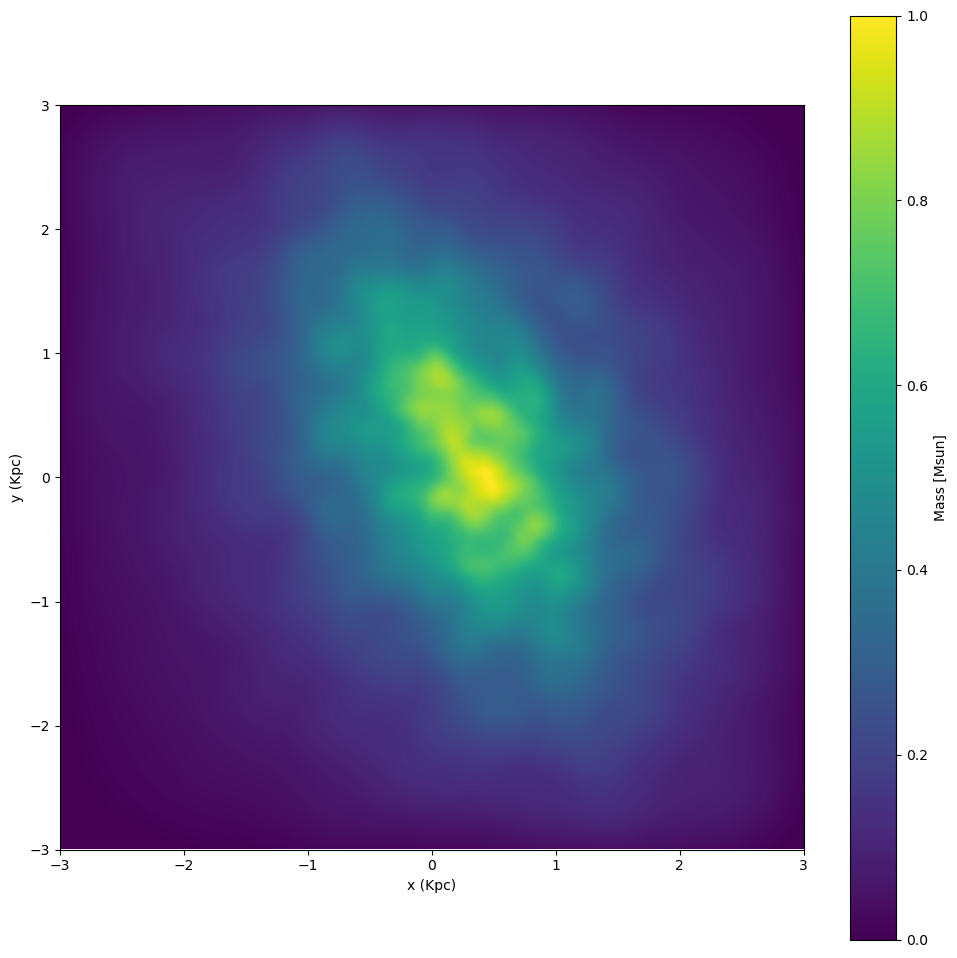

In [6]:
image = rendmap.single_map(r='infinity', p=None, t=None, ex=3, zoom=1, spos='faceon', vmin=1, vmax=100, mode='linear', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

In [7]:
rendmap = SingleRender(snapfile, catfile, n, ('PartType0', 'Masses'), region=True, dim='Msun')

yt : [INFO     ] 2024-08-29 18:16:13,888 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-08-29 18:16:13,900 Calculating time from 4.005e-01 to be 1.367e+17 seconds
yt : [INFO     ] 2024-08-29 18:16:13,902 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-29 18:16:13,994 Parameters: current_time              = 1.3672323220435099e+17 s
yt : [INFO     ] 2024-08-29 18:16:13,995 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-29 18:16:13,995 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-29 18:16:13,996 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-08-29 18:16:13,997 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-08-29 18:16:13,997 Parameters: current_redshift          = 1.4966919055836132
yt : [INFO     ] 2024-08-29 18:16:13,998 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-29 18:16:13,999 Parame

In [ ]:
image = rendmap.single_map(r='infinity', p=None, t=None, ex=3, zoom=1, spos='faceon', vmin=1, vmax=100, mode='linear', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

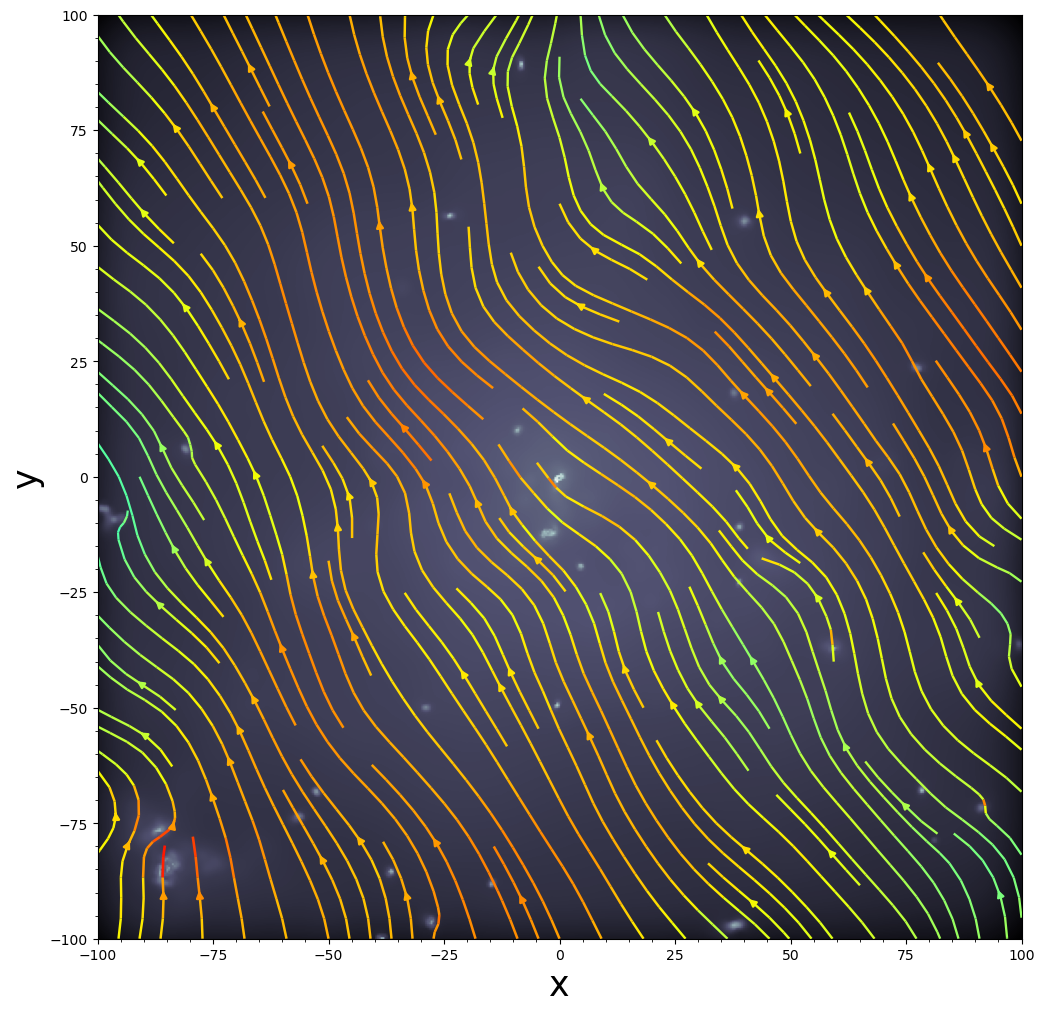

(<Figure size 1200x1200 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [8]:
rendmap.stream_plot(ex=100, p=None, t=None, xl='x',  yl='y', spos='faceon')